<a href="https://colab.research.google.com/github/hwuiwon/ml-study/blob/master/Using_scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Scikit-learn**

## **Summary**

We call performance on out-of-sample data of the models learned by the algorithm as **Generalization Performance**.

In order to check model's performance by the **"right"** way, we split the train data set into two and use one of them in training and use the other part to test the model.

### **Rules**

> When spliting the training data set into two, there should be more train set than test set.

> Training data should be mixed evenly between both sets.

## **Wisconsin breast cancer dataset**

We will use **Wisconsin breast cancer dataset** from scikit-learn.

In [0]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

We will check cancer's data and target.

In [0]:
print(cancer.data.shape, cancer.target.shape)

(569, 30) (569,)


It seems there are **569** data and **30** cancer characteristics.

In [0]:
cancer.data[:3]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

As there are too many characteristics, we will use the box plot to show each characteristic's **quartile value** instead of using scatter plot.
<br><br>
First import **matplotlib** and **numpy** by running the code below.

In [0]:
import matplotlib.pyplot as plt
import numpy as np

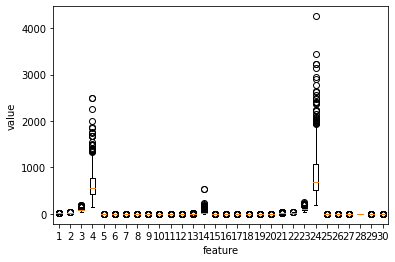

In [0]:
plt.boxplot(cancer.data)
plt.xlabel('feature')
plt.ylabel('value')
plt.show()

By looking at the box plot, we can see distribution of **4, 14, and 24th feature** is greater than others.

Let's check what those features are.

In [0]:
cancer.feature_names[[3,13,23]]

array(['mean area', 'area error', 'worst area'], dtype='<U23')

We will now check target of the cancer dataset.

In [0]:
np.unique(cancer.target, return_counts=True)

(array([0, 1]), array([212, 357]))

There are 212 benign tumors (target value = 0) and 357 malignant tumors (target value = 1).

In [0]:
x = cancer.data
y = cancer.target

As mentioned in the rule previously, we will split the data into two individual sets.

In [0]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)

> **stratify** parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter.

> **train_test_split** method splits data set into a training data set and test data set of 75:25 ratio.<br>In this case, we use **test_size** parameter to change that ratio into 80:20.

Let's check if our data set is split.

In [0]:
print(x_train.shape, x_test.shape)
np.unique(y_train, return_counts=True)

(455, 30) (114, 30)


(array([0, 1]), array([170, 285]))

### **Embodying Logistic Regression**

![Concept](https://drive.google.com/uc?id=1yxClBI1owKWIYlicrrUg-2PGb990oDsd)

In [0]:
class LogisticNeuron:

  def __init__(self):
    self.w = np.ones(x.shape[1])
    self.b = 0
  
  def forpass(self, x):
    z = np.sum(x * self.w) + self.b
    return z

  # Calculate gradient
  def backprop(self, x, err):
    w_grad = x * err
    b_grad = 1 * err
    return w_grad, b_grad

  # Training
  def fit(self, x, y, epochs=100):
    for _ in range(epochs):
      for x_i, y_i in zip(x, y):
        z = self.forpass(x_i)
        a = self.activation(z)
        err = -(y_i - a)
        w_grad, b_grad = self.backprop(x_i, err)
        self.w -= w_grad
        self.b -= b_grad
  
  # Sigmoid function
  def activation(self, z):
    a = 1 / (1 + np.exp(-z))
    return a

  def predict(self, x):
    z = [self.forpass(x_i) for x_i in x]
    a = self.activation(np.array(z))
    return a > 0.5

Now we will train model by using LogisticNeuron.

In [0]:
neuron = LogisticNeuron()
neuron.fit(x_train, y_train)

np.mean(neuron.predict(x_test) == y_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: overflow encountered in exp


0.8245614035087719

It seems that our model has accuracy of **82.46%**

We will now try to improve the accuracy.

### **Gradient Descent**

We used **stochastic gradient descent**, which is calculating gradient by randomly choosing one sample from the data.

However we will now use **batch gradient descent** that uses all training set to calculate gradient. 

The types of gradient descent mentioned previously should calculate $w$ by shuffling indexes randomly for each epoch.<br>That way, the search process is diversified and we can find the optimal weight $w$.

This can be done by using 

```
np.random.permutation()
```



In [0]:
class SingleLayer:

  def __init__(self):
    self.w = np.ones(x.shape[1])
    self.b = 0
    self.losses = []

  def forpass(self, x):
    z = np.sum(x * self.w) + self.b
    return z

  def backprop(self, x, err):
    w_grad = x * err
    b_grad = 1 * err
    return w_grad, b_grad

  def add_bias(self, x):
    return np.c_[np.ones((x.shape[0], 1)), x]

  def activation(self, z):
    a = 1 / (1 + np.exp(-z))
    return a
  
  def fit(self, x, y, epochs=100):
    for i in range(epochs):
      loss = 0
      indexes = np.random.permutation(np.arange(len(x))) # Mixing index
      for i in indexes:
        z = self.forpass(x[i])
        a = self.activation(z)
        err = -(y[i] - a)
        w_grad, b_grad = self.backprop(x[i], err)
        self.w -= w_grad # No learning rate?
        self.b -= b_grad
        a = np.clip(a, 1e-10, 1 - 1e-10) # Clipping value for stable log calculation

        loss += -(y[i] * np.log(a) + (1 - y[i]) * np.log(1 - a))
      self.losses.append(loss/len(y))

  def predict(self, x):
    z = [self.forpass(x_i) for x_i in x]
    # No activation?
    return np.array(z) > 0

  def score(self, x, y):
    return np.mean(self.predict(x) == y)

It's time to test our new neural network.

In [0]:
layer = SingleLayer()
layer.fit(x_train, y_train)
layer.score(x_test, y_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


0.9298245614035088

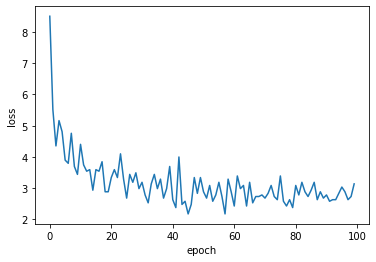

In [0]:
plt.plot(layer.losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

We can see that accuracy increased from **0.82** to **0.89**.<br>This is because we mixed index of training set for each epoch.

## **Using Class from scikit-learn**

**SGDClassifier** is a class that implemens gradient descent.

In [0]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
x = cancer.data
y = cancer.target
x_train_all, x_test, y_train_all, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)

In [0]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(loss='log', random_state=42)
sgd.fit(x_train_all, y_train_all)
sgd.score(x_test, y_test)

0.8333333333333334

We can select other loss function to improve accuracy of our model.

We will try using **hinge** loss function.

In [0]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(loss='hinge', random_state=42)
sgd.fit(x_train_all, y_train_all)
sgd.score(x_test, y_test)

0.9385964912280702

A Model that uses the hinge loss function to train yields better performance. We call this **"tuning"**.

However, there is a high probability that this model will **not perform well in real life**.<br>If we tune a model by using a test set, it creates a model that shows good performance on "test data" not "real data".

So what should we do?

### **Preparing Validation Set**

We simply don't have to use test set to tune our model to prevent problem mentioned previously.<br>We will create an another set called **validation set**.

In [0]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
x = cancer.data
y = cancer.target
x_train_all, x_test, y_train_all, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)

x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, stratify=y_train_all, test_size=0.2, random_state=42)
print(len(x_train), len(x_val))

364 91


Here, we divided original training model into new training model and validation model with the ratio of 8:2.

### **Evaluating with Validation Set**

In [0]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(loss='log', random_state=42)
sgd.fit(x_train, y_train)
sgd.score(x_val, y_val)

0.6923076923076923

Model's accuracy has decreased compared to previous trial that didn't have validation set.<br>This is because the **size of the training set has decreased** as we divided it to create validation set.

There are only small number of data in Wisconsin breast cancer data set that scikit-learn provides.<br>If we had more data, it would have been better.

#### **Splitting ratio**

> **n > 100,000**: 8:1:1<br>
> **n > 1,000,000**: 98:1:1

where **n** is number of data and<br>
**Ratio** - Training Data : Validation Data : Test Data

## **Improving Performance**

### **Data Preprocessing**

Data collected in real life may not be uniform, unlike data sets in scikit-learn and other machine learning packages that are well processed.<br>If we use those data without preprocessing, we won't be able to yield accurate results.

#### **Case 1: Scale Difference**

If the scale of data's characteristics differs a lot with each other, our model may not find  the optimal value of $w$ and b.

['mean perimeter' 'mean area']


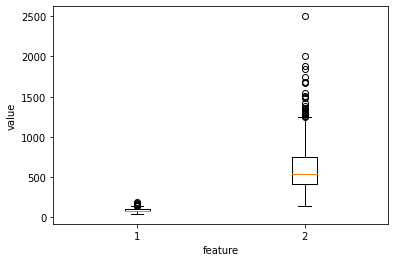

In [0]:
print(cancer.feature_names[[2, 3]])
plt.boxplot(x_train[:, 2:4])
plt.xlabel('feature')
plt.ylabel('value')
plt.show()

By looking at the graph, we can see that the scale of 'mean perimeter' and 'mean area' is different.<br>Values of mean perimeter are distributed between **100 ~ 200** while values of mean area are distributed between **200 ~ 2,000**.

What will happen to $w$ if we apply logistic regression function with these values?

We will find out by modifying SingleLayer class that was created previously.

In [0]:
class SingleLayer2:

  # Added weight_history & learning_rate
  def __init__(self, learning_rate=0.1):
    self.w = None
    self.b = None
    self.losses = []
    self.w_history = []
    self.lr = learning_rate

  def forpass(self, x):
    z = np.sum(x * self.w) + self.b
    return z

  def backprop(self, x, err):
    w_grad = x * err
    b_grad = 1 * err
    return w_grad, b_grad

  def add_bias(self, x):
    return np.c_[np.ones((x.shape[0], 1)), x]

  def activation(self, z):
    a = 1 / (1 + np.exp(-z))
    return a
  
  # Record weight history
  def fit(self, x, y, epochs=100):
    self.w = np.ones(x.shape[1])
    self.b = 0
    self.w_history.append(self.w.copy())
    for i in range(epochs):
      loss = 0
      indexes = np.random.permutation(np.arange(len(x)))
      for i in indexes:
        z = self.forpass(x[i])
        a = self.activation(z)
        err = -(y[i] - a)
        w_grad, b_grad = self.backprop(x[i], err)
        self.w -= self.lr * w_grad                          # Multiply weight gradient with learning rate 
        self.b -= b_grad
        self.w_history.append(self.w.copy())                # Record weight history
        a = np.clip(a, 1e-10, 1 - 1e-10)

        loss += -(y[i] * np.log(a) + (1 - y[i]) * np.log(1 - a))
      self.losses.append(loss/len(y))

  def predict(self, x):
    z = [self.forpass(x_i) for x_i in x]
    return np.array(z) > 0

  def score(self, x, y):
    return np.mean(self.predict(x) == y)

We made following changes to original SingleLayer:

1. Added weight_history & learning_rate when it gets initialized.
2. Record weight history and multiply learning weight with weight gradient when changing the weight.

Now lets test and see the results.

In [0]:
layer1 = SingleLayer2()
layer1.fit(x_train, y_train)
layer1.score(x_val, y_val)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: overflow encountered in exp


0.9230769230769231

Before we adjust the scale of data's characteristics, we got **91.2%** accuracy.

Now we will see how our weight $w$ changed over each epoch.<br>Final value of $w$ will be shown as a red dot.

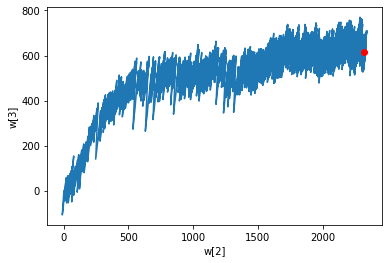

In [0]:
w2 = []
w3 = []
for w in layer1.w_history:
  w2.append(w[2])
  w3.append(w[3])
plt.plot(w2, w3)
plt.plot(w2[-1], w3[-1], 'ro')
plt.xlabel('w[2]')
plt.ylabel('w[3]')
plt.show()

By looking at the graph, we can see the value of w3 **fluctuates widely**.<br>This is because as the gradient for w3 is large, the weight fluctuates greatly along the w3 axis'

We can improve our results by using **standarization**.

#### **Solution 1: Standarization**

Formula: $z=\frac{x-\mu}{s}$, where $x$ is value, $\mu$ is mean, and $s$ is standard deviation.

We will calculate mean and standard deviation by using numpy.

In [0]:
import numpy as np

train_mean = np.mean(x_train, axis=0)
train_std = np.std(x_train, axis=0)
x_train_scaled = (x_train - train_mean) / train_std

Now we will trian the model with standatized data sets using SingleLayer2.

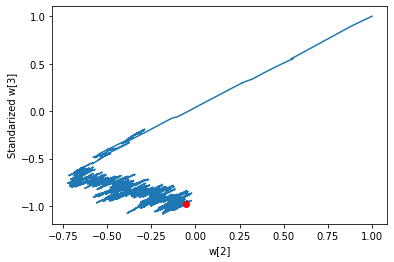

In [0]:
layer2 = SingleLayer2()
layer2.fit(x_train_scaled, y_train)
w2 = []
w3 = []
for w in layer2.w_history:
  w2.append(w[2])
  w3.append(w[3])
plt.plot(w2, w3)
plt.plot(w2[-1], w3[-1], 'ro')
plt.xlabel('w[2]')
plt.ylabel('Standarized w[3]')
plt.show()

We will check whether this this model yields better accuracy than previous model without standarization.

In [0]:
x_val_scaled = (x_val - train_mean) / train_std
layer2.score(x_val_scaled, y_val)

0.967032967032967

The accuracy of a model **improved** by approximately 5.5%. (0.912 -> 0.967)

It is important to **scale training set and validation set with same ratio**.

### **Overfitting & Underfitting**

#### **Definition**

**Overfitting**: The model performs well with training set, but doesn't perform well with validation set.<br>Ex) 99% accuracy with training set but 80% accuracy with validation set

**Underfitting**: The performace between training set and validation set is similar but it's overall accuracy is low.

We also say overfitted model has **high variance** and unferfitted model is **highly biased**.

#### **Main Cause**

**Overfitting**

> Samples of sufficiently diverse patterns were not included in the training set.<br>Overfitted model can be improved by collecting more training data.

> If it's realistically hard to collect more data, we can **regularize** the weight $w$.

**Underfitting**

> Model isn't complex enough to analyze the data set and return the right result.<br>Underfitted model can be improved by using more complex models.

![Graph](https://drive.google.com/uc?id=1cUr8nJnEPeT4PHxC61EdAC1de3lYZemf)

Where x-axis is **epochs** and y-axis is **accuracy**.

#### **Bias-variance Tradeoff**

Models with a lower bias in parameter estimation have a higher variance of the parameter estimates across samples, and vice versa.

We need to select an appropriate point to prevent high bias and variance.<br>To record losses in validation, we will make edits in SingleLayer2 class.

In [0]:
class SingleLayer3:

  # Added validation losses
  def __init__(self, learning_rate=0.1):
    self.w = None
    self.b = None
    self.losses = []
    self.val_losses = []
    self.w_history = []
    self.lr = learning_rate

  def forpass(self, x):
    z = np.sum(x * self.w) + self.b
    return z

  def backprop(self, x, err):
    w_grad = x * err
    b_grad = 1 * err
    return w_grad, b_grad

  def add_bias(self, x):
    return np.c_[np.ones((x.shape[0], 1)), x]

  def activation(self, z):
    a = 1 / (1 + np.exp(-z))
    return a
  
  def fit(self, x, y, epochs=100, x_val=None, y_val=None):
    self.w = np.ones(x.shape[1])
    self.b = 0
    self.w_history.append(self.w.copy())
    for i in range(epochs):
      loss = 0
      indexes = np.random.permutation(np.arange(len(x)))
      for i in indexes:
        z = self.forpass(x[i])
        a = self.activation(z)
        err = -(y[i] - a)
        w_grad, b_grad = self.backprop(x[i], err)
        self.w -= self.lr * w_grad
        self.b -= b_grad
        self.w_history.append(self.w.copy())
        a = np.clip(a, 1e-10, 1 - 1e-10)
        loss += -(y[i] * np.log(a) + (1 - y[i]) * np.log(1 - a))

      self.losses.append(loss/len(y))
      self.update_val_loss(x_val, y_val)          # Update validation loss for each epoch

  def predict(self, x):
    z = [self.forpass(x_i) for x_i in x]
    return np.array(z) > 0

  def score(self, x, y):
    return np.mean(self.predict(x) == y)

  # Method that updates validation losses
  def update_val_loss(self, x_val, y_val):
    if x_val is None:
      return
    val_loss = 0
    for i in range(len(x_val)):
      z = self.forpass(x_val[i])
      a = self.activation(z)
      a = np.clip(a, 1e-10, 1-1e-10)
      val_loss += -(y_val[i] * np.log(a) + (1 - y_val[i]) * np.log(1 - a))
    self.val_losses.append(val_loss / len(y_val))

Let's train our model with an modified model.

In [0]:
layer3 = SingleLayer3()
layer3.fit(x_train_scaled, y_train, x_val=x_val_scaled, y_val=y_val)

Now we will draw a graph to see validation losses.

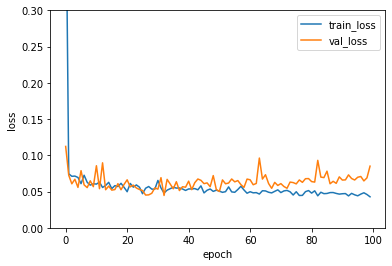

In [0]:
plt.ylim(0, 0.3)
plt.plot(layer3.losses)
plt.plot(layer3.val_losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

We can see that validation loss gets higher than training set after 20 epochs.<br>At this point, as we go through more epochs to train our model, $w$ will **fit better with training set**, but less with validation set.

So after going through 20 epochs, there is no need to train anymore.<br>We call this technique '**early stopping**'.

In [0]:
layer4 = SingleLayer3()
layer4.fit(x_train_scaled, y_train, epochs=20)
layer4.score(x_val_scaled, y_val)

0.978021978021978

The accuracy of a model **improved** by approximately 1.1%. (0.967 -> 0.978)

### **Regularization**

Regularization are techniques used to reduce the error by fitting a function appropriately on the given training set and avoid overfitting.

#### **L1 Regularization (Lasso Regression)**

The constant value is subtracted regardless of the size of the weight. This generally applies in a way that makes the number of unnecessary weights zero. In other words, it is suitable for constructing a model for sparse features because it takes only important weights.

#### **L2 Regularization (Ridge Regression)**

For L2, the weight value is used. It means that we can respond to a certain amount of bouncing. Therefore, it is recommended to use it when learning about outliers or noisy data. It is especially good for generalizing linear models.

#### **Implementation**

Change the penalty parameter to use L1 or L2.

In [0]:
sgd = SGDClassifier(loss='log', penalty='l2', alpha=0.001, random_state=42)
sgd.fit(x_train_scaled, y_train)
sgd.score(x_val_scaled, y_val)

0.978021978021978

There is no significant change in accuracy because there are only small number of data in a set we used.

### **Cross Validation**

This technique is used to evaluate machine learning models on a limited data sample.

The procedure has a single parameter called **k** that refers to the number of blocks that a given data will be split into.<br>These blocks are also called as **folds**.

#### **Procedure**

1. Split the training set into k folds.
2. Use the first fold as validation set and remaining folds as training set.
3. Train the model and validate it using validation set.
4. Repeat in turn using the next fold as a validation set.
5. Evaluate the performance k times by using k validation sets and calculate the mean of accuracy to find final performance.

#### **Implementation**

We will use **cross_validate()** method and **pipeline** to implement cross validation.

We are using Pipeline to prevent **data leakage during cross validation**.

In [0]:
from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

sgd = SGDClassifier(loss='log', penalty='l2', alpha=0.001, random_state=42)
pipe = make_pipeline(StandardScaler(), sgd)
scores = cross_validate(pipe, x_train_all, y_train_all, cv=10, return_train_score=True)
print(np.mean(scores['test_score']))

0.9694202898550724


**Parameters**

> **alpha**: Constant that multiplies the regularization term.